In [2]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [40]:
#Combine all file (.final) from different folder in one folder
def combine_file(directory):
    final_file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.final'):
                file_path = os.path.join(root, file)
                final_file_paths.append(file_path)
    return final_file_paths

In [41]:
files_dev = combine_file('../data/dev/')
files_test = combine_file('../data/test/')
files_train = combine_file('../data/train/')

In [43]:
files_test

['../data/test/2009\\2009-35-4-559-595.final',
 '../data/test/2010\\2010-36-1-31-69.final',
 '../data/test/2011\\2011-37-3-455-488.final',
 '../data/test/2012\\2012-38-4-827-865.final',
 '../data/test/2013\\2013-39-4-999–1023.final',
 '../data/test/2014\\2014-40-2-469-510.final',
 '../data/test/2015\\2015-41-2-293-336.final',
 '../data/test/2016\\2016-42-3-491-525.final',
 '../data/test/2017\\2017-43-1-1-30.final',
 '../data/test/2018\\2018-44-3-525-546.final',
 '../data/test/2019\\2019-45-2-339-379_.final',
 '../data/test/2020\\2020-46-4-745-762.final',
 '../data/test/2021\\2021-47-1-43-68.final',
 '../data/test/2022\\2022-48-2-343-373.final',
 '../data/test/2022\\2022-48-4-849-886.final',
 '../data/test/2023\\2023-49-2-373-392.final',
 '../data/test/2023\\2023-49-4-883-942.final',
 '../data/test/2024\\2024-50-1-351-417.final']

In [45]:
#Read data and convert it to datafram by have 2 column token and label
def read_data(file):
    df = pd.read_csv(file, on_bad_lines='skip',encoding='ISO-8859-1', sep=r'\t| +', engine='python', header=None)
    df = df.rename(columns={0: 'token', 1: 'label'})
    df = df.dropna(subset=['label'])
    df = df[['token', 'label']]
    return df

In [46]:
#Visualization wordclound
def display_wordcloud(df):
    text = ' '.join(df['token'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [47]:
#Count entity in the dataframe
def count_entities(df):
    # Initialize variables to store entity counts
    entities = []
    current_entity = None

    # Iterate through the rows to group entities
    for i, row in df.iterrows():
        word, label = row["token"], row["label"]
        
        if label.startswith("B"):  # Beginning of a new entity
            if current_entity:  # If there was a previous entity, save it
                entities.append(current_entity)
            current_entity = [word]  # Start a new entity
        elif label.startswith("I") and current_entity is not None:  # Inside an entity
            current_entity.append(word)
        else:  # Not part of an entity (O label)
            if current_entity:  # Save the current entity if it exists
                entities.append(current_entity)
                current_entity = None

    # If there's an ongoing entity at the end, add it to the list
    if current_entity:
        entities.append(current_entity)

    # Count the occurrences of each entity
    entity_counts = Counter(tuple(entity) for entity in entities)

    return entity_counts

## Train Dataset

In [54]:
#Covert train data to dataframe 
train_df = pd.concat([read_data(file) for file in files_train])
train_df.head()

,token,label
0,In,O
1,this,O
2,article,O
3,we,O
4,discuss,O


In [55]:
train_df['label'].unique()

array(['O', 'B', 'I', 'II', 'b'], dtype=object)

In [56]:
#eplace b with B and II to I
train_df['label'].replace({
    'II':'I',
    'b': 'B'
}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5184\489613835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['label'].replace({


In [57]:
train_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [58]:
train_df.isnull().sum()

token    0
label    0
dtype: int64

In [59]:
#Count Entities
count_entities_train = (count_entities(train_df))
count_entities_train

Counter({('models',): 28,
         ('model',): 21,
         ('NLP',): 18,
         ('parsing',): 15,
         ('data',): 14,
         ('state', '-', 'of', '-', 'the', '-', 'art'): 12,
         ('algorithm',): 12,
         ('natural', 'language', 'processing'): 12,
         ('data', 'sets'): 12,
         ('features',): 11,
         ('languages',): 11,
         ('translation',): 10,
         ('annotation',): 10,
         ('corpus',): 10,
         ('language', 'models'): 10,
         ('annotated',): 9,
         ('parser',): 9,
         ('linguistic',): 9,
         ('baseline',): 8,
         ('machine', 'translation'): 8,
         ('OT',): 8,
         ('training', 'data'): 8,
         ('SMT',): 8,
         ('language', 'model'): 8,
         ('semantics',): 8,
         ('context',): 8,
         ('translation', 'divergences'): 8,
         ('NMT',): 8,
         ('annotation', 'guidelines'): 7,
         ('F', '-', 'score'): 7,
         ('English',): 7,
         ('Arabic',): 7,
         ('word'

In [60]:
print("Top 10 most frequent entities in the dev set:")
for entity, count in count_entities_train.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the dev set:
28x ('models',)
21x ('model',)
18x ('NLP',)
15x ('parsing',)
14x ('data',)
12x ('state', '-', 'of', '-', 'the', '-', 'art')
12x ('algorithm',)
12x ('natural', 'language', 'processing')
12x ('data', 'sets')
11x ('features',)


In [62]:
#Total entities in train data 
total_entities_train_df = sum(count_entities_train.values())
print(f'Total entities in train dataset: {total_entities_train_df}')

Total entities in train dataset: 3248


In [63]:
#Token distribution
train_df['token_length'] = train_df['token'].apply(lambda x: len(x))
train_df['token_length'].describe()

count    26742.000000
mean         5.180353
std          3.361480
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         44.000000
Name: token_length, dtype: float64

In [64]:
unique_words_train = len(set(token for token in train_df['token'].tolist()))
print(unique_words_train)

3863


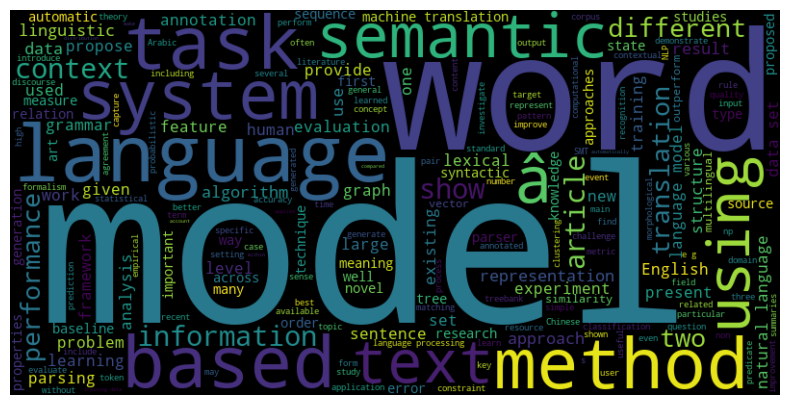

In [65]:
display_wordcloud(train_df)

## Dev dataset

In [66]:
dev_df = pd.concat([read_data(file) for file in files_dev])
dev_df.head()

,token,label
0,This,O
1,article,O
2,presents,O
3,an,O
4,investigation,O


In [67]:
dev_df['label'].unique()

array(['O', 'B', 'I', 'b'], dtype=object)

In [68]:
dev_df['label'].replace('b', 'B', inplace = True)

In [69]:
dev_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [70]:
dev_df.isnull().sum()

token    0
label    0
dtype: int64

In [71]:
count_entities_dev = count_entities(dev_df)
count_entities_dev

Counter({('parsing',): 8,
         ('crossing', 'dependencies'): 6,
         ('AMR',): 6,
         ('ESA',): 5,
         ('LFG', 'grammar'): 5,
         ('permutations',): 5,
         ('model',): 4,
         ('corpora',): 4,
         ('MRLs',): 4,
         ('corpus',): 3,
         ('information',): 3,
         ('Evaluation',): 3,
         ('f', '-', 'structure'): 3,
         ('natural', 'language', 'processing'): 3,
         ('machine', 'translation'): 3,
         ('framework',): 3,
         ('state', '-', 'of', '-', 'the', '-', 'art'): 3,
         ('NLP',): 3,
         ('Q', '-', 'LID'): 3,
         ('cross-lingual', 'AMR'): 3,
         ('granularity',): 2,
         ('requests',): 2,
         ('generation',): 2,
         ('syntactic', 'processing'): 2,
         ('accuracy',): 2,
         ('unsupervised',): 2,
         ('Selection',): 2,
         ('Adjustment',): 2,
         ('context', '-', 'free', 'grammar'): 2,
         ('context', '-', 'free'): 2,
         ('cross', '-', 'lingual')

In [72]:
print("Top 10 most frequent entities in the dev set:")
for entity, count in count_entities_dev.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the dev set:
8x ('parsing',)
6x ('crossing', 'dependencies')
6x ('AMR',)
5x ('ESA',)
5x ('LFG', 'grammar')
5x ('permutations',)
4x ('model',)
4x ('corpora',)
4x ('MRLs',)
3x ('corpus',)


In [73]:
totat_entities_dev_df = sum(count_entities_dev.values())
print(f'Total entities in dev dataset: {totat_entities_dev_df}')

Total entities in dev dataset: 394


In [76]:
#Token Distribution
dev_df['token_length'] = dev_df['token'].apply(lambda x: len(x))
dev_df

,token,label,token_length
0,This,O,4
1,article,O,7
2,presents,O,8
3,an,O,2
4,investigation,O,13
...,...,...,...
274,",",O,1
275,and,O,3
276,meaning,O,7
277,generally,O,9


In [78]:
#Unique Word 
unique_words = set(token for token in dev_df['token'].tolist())
print(len(unique_words))  # Number of unique words

1090


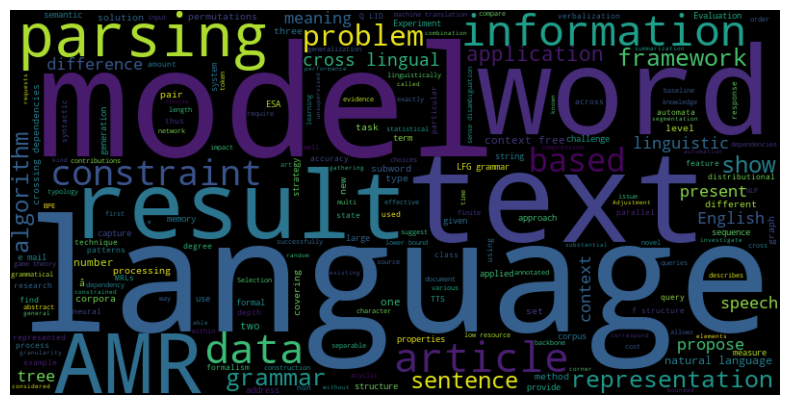

In [79]:
display_wordcloud(dev_df)

## Test Dataset

In [80]:
test_df = pd.concat([read_data(file) for file in files_test])
test_df.head()

,token,label
0,Systems,O
1,based,O
2,on,O
3,synchronous,B
4,grammars,I


In [81]:
test_df['label'].unique()

array(['O', 'B', 'I', '0', 'o', 'i'], dtype=object)

In [82]:
test_df['label'].replace({
    '0': 'O',
    'o': 'O',
    'i': 'I'
}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5184\2340896358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['label'].replace({


In [83]:
test_df['label'].unique()

array(['O', 'B', 'I'], dtype=object)

In [84]:
test_df.isnull().sum()

token    0
label    0
dtype: int64

In [86]:
#Count Entities
count_entities_test = count_entities(test_df)
count_entities_test

Counter({('NER',): 8,
         ('Arabic',): 7,
         ('polysemy',): 6,
         ('string', 'kernels'): 5,
         ('embeddings',): 5,
         ('deverbal', 'nominalizations'): 4,
         ('ADN', '-', 'Classiï¬\x81er'): 4,
         ('phrase', 'tables'): 4,
         ('native', 'language', 'identification'): 4,
         ('linguistic', 'variation'): 3,
         ('translationese',): 3,
         ('parser',): 3,
         ('state', '-', 'of', '-', 'the', '-', 'art'): 3,
         ('log', '-', 'linear', 'model'): 3,
         ('polysemous',): 3,
         ('computationally',): 2,
         ('accuracy',): 2,
         ('semantic', 'distance'): 2,
         ('natural', 'language', 'generation'): 2,
         ('linguistic', 'style'): 2,
         ('SNLG',): 2,
         ('stylistic', 'variation'): 2,
         ('parameter', 'estimation', 'models'): 2,
         ('denotative', 'distinction'): 2,
         ('statistical', 'machine', 'translation'): 2,
         ('parallel', 'corpora'): 2,
         ('NLP',):

In [87]:
print("Top 10 most frequent entities in the test set:")
for entity, count in count_entities_test.most_common(10):
    print(f"{count}x {entity}")

Top 10 most frequent entities in the test set:
8x ('NER',)
7x ('Arabic',)
6x ('polysemy',)
5x ('string', 'kernels')
5x ('embeddings',)
4x ('deverbal', 'nominalizations')
4x ('ADN', '-', 'Classiï¬\x81er')
4x ('phrase', 'tables')
4x ('native', 'language', 'identification')
3x ('linguistic', 'variation')


In [89]:
total_entities_test_df = sum(count_entities_test.values())
print(f'Total entities in test dataset: {total_entities_test_df}')

Total entities in test dataset: 445


In [90]:
#Token Distibution
test_df['token_length'] = test_df['token'].apply(lambda x: len(x))
test_df['token_length'].describe()

count    3899.000000
mean        5.304437
std         3.356133
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        17.000000
Name: token_length, dtype: float64

In [91]:
#Unique word
unique_words_test= len(set(token for token in test_df['token'].tolist()))
print(unique_words_test)

1181


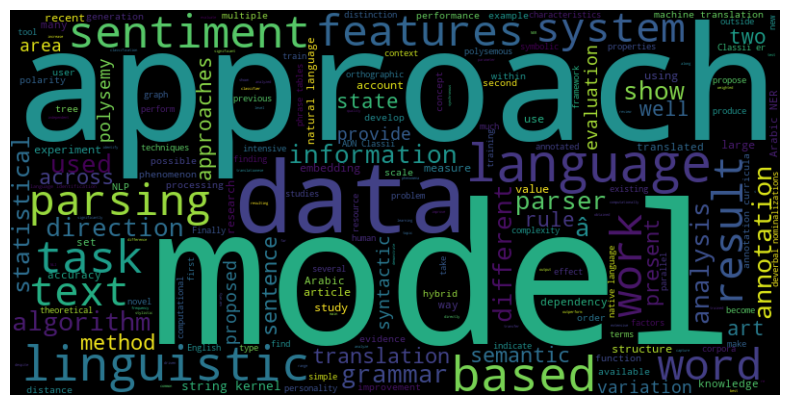

In [92]:
display_wordcloud(test_df)

In [95]:
dev_df.to_csv('../data/data_dev.csv', index=False)
print("Saved cleaned dev data to cleaned_data folder")

Saved cleaned dev data to cleaned_data folder


In [98]:
train_df.to_csv('../data/data_train.csv', index=False)
print("Saved cleaned train data to cleaned_data folder")

Saved cleaned train data to cleaned_data folder


In [97]:
test_df.to_csv('../data/data_test.csv', index=False)
print("Saved cleaned train data to cleaned_data folder")

Saved cleaned train data to cleaned_data folder
